In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_datasets_grid(datasets,
                       random_prob,
                       mask_ratio,
                       titles=("Check-in", "Crime", "Service call"),
                       z_lims=((0.4, 1.0), (0, 0.8), (0.2, 0.7)),
                       z_ticks=(np.arange(0.4, 1.1, 0.1),
                                np.arange(0, 0.9, 0.1),
                                np.arange(0.2, 0.8, 0.1))):
    """
    生成多城市 × 多任务的三维性能网格图，按 “城市（行）× 任务（列）” 排列，
    展示特定城市 + 任务组合下，性能指标（如 R²）随 X 轴（Local Ratio）和 Y 轴（Regional Ratio）变化的分布。

    参数:
        datasets : 字典，外层键为城市名称，内层键为任务名称，值为二维数组（性能数据，shape 与random_prob×mask_ratio对应）
        random_prob : 一维数组，表示 Y 轴的变量取值
        mask_ratio : 一维数组，表示 X 轴的变量取值
        titles : 元组，长度与任务数量一致，每个元素为任务名称
        z_lims : 元组，长度与任务数量一致，每个元素为(min, max)元组，表示每列的 z 轴范围
        z_ticks : 元组长度与任务数量一致，每个元素为 Z 轴刻度数组

    配色：
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(mask_ratio)))
    """

    def create_3d_bar(ax, data, z_lim, z_ticks, title,
                  random_prob, mask_ratio):
        """
        在给定 ax 上绘制 3D 柱状图
        """
        data = data.T
        y, x = np.meshgrid(np.arange(len(random_prob)), np.arange(len(mask_ratio)))
        dx = dy = 0.8
        colors = plt.cm.coolwarm(np.linspace(0, 1, len(mask_ratio)))
    
        # 底面
        ax.plot_surface(x, y, np.full_like(data, z_lim[0]),
                        color='gray', alpha=0.3)
    
        # 柱子
        for i in range(len(mask_ratio)):
            for j in range(len(random_prob)):
                ax.bar3d(x[i, j], y[i, j], z_lim[0],
                         dx, dy, data[i, j] - z_lim[0],
                         color=colors[i], alpha=1)
    
        ax.set_xticks(np.arange(len(mask_ratio)) + 0.4)
        ax.set_yticks(np.arange(len(random_prob)) + 0.4)
        ax.set_xticklabels(mask_ratio, fontsize=10)
        ax.set_yticklabels(random_prob, fontsize=10)
        ax.set_xlabel('Local Ratio', fontsize=12)
        ax.set_ylabel('Regional Ratio', fontsize=12)
        ax.set_zlabel('R²', fontsize=14, rotation=90)
        ax.set_zlim(z_lim)
        ax.set_zticks(z_ticks)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.view_init(elev=30, azim=45)
        ax.tick_params(axis='z', labelsize=10)
        ax.set_title(title, fontsize=12)
    
    n_rows = len(datasets)
    n_cols = len(titles)

    fig = plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    gs = fig.add_gridspec(n_rows, n_cols, hspace=0.25, wspace=0.25)

    # 子图绘制
    for i, (dataset_name, data) in enumerate(datasets.items()):
        for j, title in enumerate(titles):
            ax = fig.add_subplot(gs[i, j], projection='3d')
            create_3d_bar(ax,
                          data[title],
                          z_lims[j], z_ticks[j], "",
                          random_prob, mask_ratio)

            # 行首加城市标签
            if j == 0:
                ax.text2D(-0.25, 0.5, dataset_name,
                          transform=ax.transAxes,
                          fontsize=14, rotation=90,
                          va='center', ha='right')

            # 顶部加列标题
            if i == 0:
                ax.set_title(title, fontsize=14, pad=20)

    plt.tight_layout()
    plt.savefig('datasets_grid.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    print(f"PDF 文件已保存为 '{'datasets_grid.pdf'}'")


C:\Users\86198\AppData\Local\Temp\ipykernel_3272\112334620.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


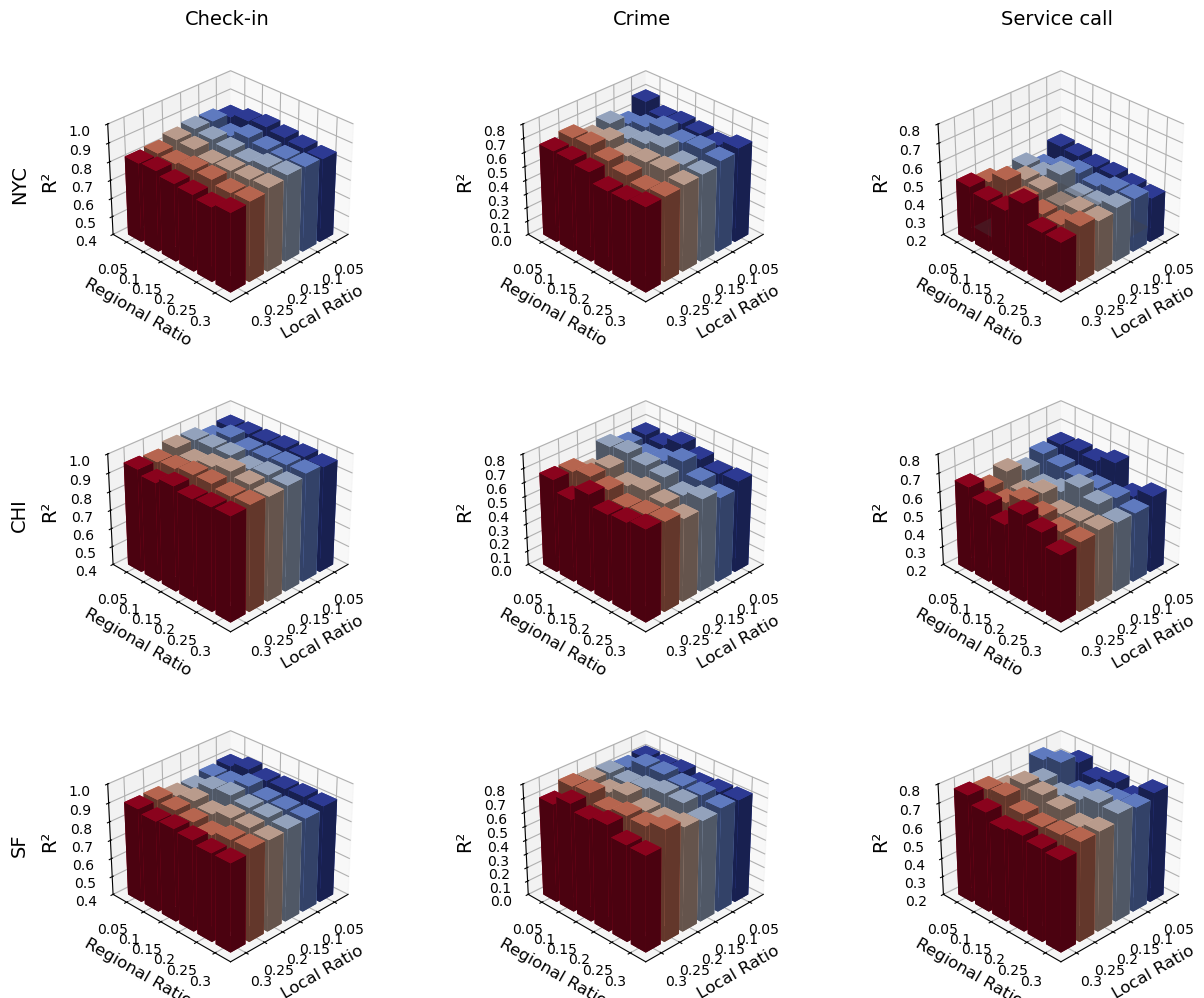

PDF 文件已保存为 'datasets_grid.pdf'


In [6]:
#示例：
# 数据集
datasets = {
    "NYC": {
        "Check-in": np.array([
            [0.848, 0.871, 0.875, 0.861, 0.835, 0.829],
            [0.872, 0.835, 0.863, 0.856, 0.827, 0.838],
            [0.885, 0.873, 0.85, 0.829, 0.843, 0.819],
            [0.873, 0.856, 0.837, 0.839, 0.841, 0.812],
            [0.863, 0.853, 0.857, 0.841, 0.821, 0.798],
            [0.853, 0.86, 0.865, 0.848, 0.828, 0.821]
        ]),
        "Crime": np.array([
            [0.711, 0.61, 0.671, 0.628, 0.69, 0.659],
            [0.653, 0.645, 0.621, 0.67, 0.699, 0.659],
            [0.669, 0.693, 0.648, 0.623, 0.654, 0.641],
            [0.659, 0.655, 0.684, 0.645, 0.619, 0.574],
            [0.638, 0.674, 0.628, 0.653, 0.583, 0.577],
            [0.678, 0.654, 0.624, 0.618, 0.605, 0.601]
        ]),
        "Service call": np.array([
            [0.486, 0.417, 0.472, 0.421, 0.481, 0.504],
            [0.479, 0.453, 0.467, 0.493, 0.54, 0.48],
            [0.465, 0.479, 0.52, 0.487, 0.481, 0.478],
            [0.467, 0.457, 0.448, 0.451, 0.458, 0.567],
            [0.453, 0.483, 0.457, 0.474, 0.453, 0.466],
            [0.441, 0.49, 0.493, 0.474, 0.499, 0.467]
        ])
    },
    "CHI": {
        "Check-in": np.array([
            [0.959, 0.945, 0.975, 0.978, 0.948, 0.955],
            [0.964, 0.989, 0.980, 0.947, 0.959, 0.931],
            [0.967, 0.965, 0.983, 0.969, 0.974, 0.962],
            [0.976, 0.969, 0.957, 0.991, 0.975, 0.944],
            [0.976, 0.979, 0.972, 0.971, 0.958, 0.952],
            [0.968, 0.981, 0.965, 0.957, 0.964, 0.956]
        ]),
        "Crime": np.array([
            [0.689, 0.677, 0.719, 0.603, 0.663, 0.668],
            [0.672, 0.651, 0.734, 0.688, 0.691, 0.591],
            [0.736, 0.677, 0.707, 0.625, 0.661, 0.693],
            [0.689, 0.735, 0.686, 0.656, 0.602, 0.619],
            [0.649, 0.659, 0.622, 0.630, 0.619, 0.631],
            [0.657, 0.605, 0.661, 0.591, 0.638, 0.653]
        ]),
        "Service call": np.array([
            [0.664, 0.657, 0.613, 0.653, 0.609, 0.662],
            [0.672, 0.631, 0.568, 0.581, 0.580, 0.618],
            [0.662, 0.618, 0.590, 0.630, 0.637, 0.562],
            [0.698, 0.609, 0.660, 0.569, 0.610, 0.664],
            [0.564, 0.605, 0.621, 0.580, 0.576, 0.623],
            [0.613, 0.573, 0.574, 0.586, 0.573, 0.558]
        ])
    },

    "SF": {
        "Check-in": np.array([
            [0.908, 0.898, 0.879, 0.882, 0.908, 0.905],
            [0.935, 0.903, 0.918, 0.901, 0.899, 0.887],
            [0.918, 0.933, 0.931, 0.878, 0.884, 0.897],
            [0.920, 0.904, 0.912, 0.905, 0.864, 0.887],
            [0.924, 0.903, 0.909, 0.902, 0.889, 0.870],
            [0.920, 0.903, 0.897, 0.888, 0.893, 0.870]
        ]),
        "Crime": np.array([
            [0.739, 0.727, 0.747, 0.752, 0.770, 0.706],
            [0.735, 0.792, 0.734, 0.728, 0.784, 0.773],
            [0.752, 0.795, 0.754, 0.769, 0.725, 0.727],
            [0.718, 0.772, 0.781, 0.723, 0.752, 0.755],
            [0.731, 0.770, 0.777, 0.715, 0.744, 0.682],
            [0.735, 0.742, 0.718, 0.739, 0.787, 0.678]
        ]),
        "Service call": np.array([
            [0.708, 0.787, 0.693, 0.723, 0.762, 0.777],
            [0.772, 0.815, 0.760, 0.790, 0.773, 0.735],
            [0.724, 0.695, 0.729, 0.779, 0.726, 0.693],
            [0.752, 0.734, 0.754, 0.749, 0.707, 0.711],
            [0.713, 0.744, 0.784, 0.706, 0.715, 0.693],
            [0.789, 0.760, 0.775, 0.732, 0.728, 0.684]
        ])
    }
}
# y 轴取值
random_prob = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
# x 轴取值
mask_ratio = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
#列标题
titles=("Check-in", "Crime", "Service call")
z_lims=((0.4, 1.0), (0, 0.8), (0.2, 0.7))
#每列的 z 轴范围
z_ticks=(np.arange(0.4, 1.1, 0.1),
        np.arange(0, 0.9, 0.1),
        np.arange(0.2, 0.8, 0.1))

plot_datasets_grid(
    datasets,
    random_prob,
    mask_ratio,
    titles,
    z_lims,
    z_ticks,
)